In [17]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
#Ingesta de datos
pesca2 = pd.read_excel ("maestro_produccion22.xlsx",sheet_name="Limpio")

In [19]:
#Muestra de datos
pesca2.head()

,Fecha,RInt,Dueño2,Materia Prima,Cj,P-C,KgBr,Desp,KgN,ProductoTerminado,IAC,KGT,Rinde
0,2022-07-22,5504,17,Almeja entera fresca,41,46.8,1918.8,0.0,1918.8,Almeja 1/2 valva IQF,1432,842.0,0.438816
1,2022-08-12,5549,10,Almeja entera fresca,53,48.8,2586.4,0.0,2586.4,Almeja 1/2 valva IQF,1438,216.0,0.083514
2,2022-05-01,5331,6,Almeja entera fresca,10,45.0,450.0,0.0,450.0,Almeja entera fresca,1,450.0,1.000000
3,2022-03-28,5240,14,Almeja entera fresca,4,40.0,160.0,0.0,160.0,Almeja entera fresca,1,160.0,1.000000
4,2022-04-07,5262,11,Almeja entera fresca,7,40.0,280.0,0.0,280.0,Almeja entera fresca,1,280.0,1.000000


In [20]:
#Tipos de datos
pesca2.dtypes

Fecha                 datetime64[ns]
RInt                           int64
Dueño2                         int64
Materia Prima                 object
Cj                             int64
P-C                          float64
KgBr                         float64
Desp                         float64
KgN                          float64
ProductoTerminado             object
IAC                            int64
KGT                          float64
Rinde                        float64
dtype: object

In [21]:
#Cantidad de registros y columnas
pesca.shape

(781, 13)

In [22]:
pesca1 = pesca2.drop("RInt", axis=1)

In [23]:
pesca = pesca1.drop("IAC", axis=1)

In [25]:
#Cantidad de registros y columnas
pesca.shape

(781, 11)

In [26]:
#Medidas generales
pesca.describe()

,Dueño2,Cj,P-C,KgBr,Desp,KgN,KGT,Rinde
count,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000
mean,12.631242,106.848912,27.404942,2562.297350,0.066782,2437.400824,815.312949,0.444750
std,4.730669,120.437515,9.707575,2840.566102,0.107622,2859.356470,1089.970581,0.321901
min,1.000000,1.000000,5.610000,7.500000,0.000000,7.500000,5.700000,0.009731
25%,10.000000,30.000000,18.360000,874.800000,0.000000,768.000000,222.000000,0.170200
50%,10.000000,59.000000,28.100000,1836.900000,0.000000,1600.000000,516.000000,0.380618
75%,17.000000,142.000000,35.300000,3104.200000,0.134000,2916.800000,948.000000,0.546265
max,24.000000,730.000000,51.500000,20776.000000,0.680000,20776.000000,12618.000000,1.259091


In [27]:
#Control de valores nulos
pesca.isna().sum()

Fecha                 0
Dueño2                0
Materia Prima         0
Cj                    0
P-C                   0
KgBr                  0
Desp                  0
KgN                   0
ProductoTerminado     0
KGT                   0
Rinde                 0
dtype: int64

In [28]:
#Cantidad de valores unicos por rango
pesca.nunique()

Fecha                 164
Dueño2                 24
Materia Prima          36
Cj                    189
P-C                   308
KgBr                  585
Desp                  129
KgN                   610
ProductoTerminado      73
KGT                   367
Rinde                 691
dtype: int64

In [29]:
#Matriz de correlacion - Metodo Pearson
pesca_df2=pd.DataFrame(pesca)
pesca_df2.corr(method = 'pearson')

,Dueño2,Cj,P-C,KgBr,Desp,KgN,KGT,Rinde
Dueño2,1.000000,0.024735,-0.051706,-0.045497,-0.023794,-0.049060,-0.060976,-0.140708
Cj,0.024735,1.000000,-0.313354,0.906596,-0.276359,0.915566,0.654751,-0.279968
P-C,-0.051706,-0.313354,1.000000,-0.029251,0.457593,-0.065101,-0.117450,-0.251681
KgBr,-0.045497,0.906596,-0.029251,1.000000,-0.151377,0.996889,0.657878,-0.312078
Desp,-0.023794,-0.276359,0.457593,-0.151377,1.000000,-0.218720,-0.203471,-0.283852
KgN,-0.049060,0.915566,-0.065101,0.996889,-0.218720,1.000000,0.661941,-0.292325
KGT,-0.060976,0.654751,-0.117450,0.657878,-0.203471,0.661941,1.000000,0.169086
Rinde,-0.140708,-0.279968,-0.251681,-0.312078,-0.283852,-0.292325,0.169086,1.000000


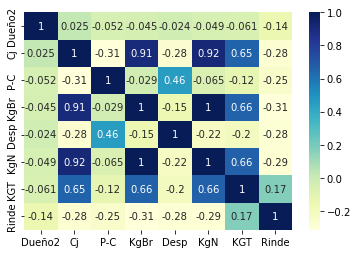

In [30]:
#Matriz de correlacion - Metodo Pearson VISUALIZACION
import seaborn as sns
sns.heatmap(pesca.corr(), annot=True, cmap="YlGnBu")
plt.show()

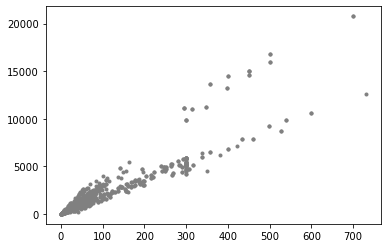

In [31]:
#Grafico de puntos - Cantidad de cajones vs. Kg Netos
plt.scatter(pesca.Cj ,pesca.KgN, marker=".",facecolor='gray')
plt.show()

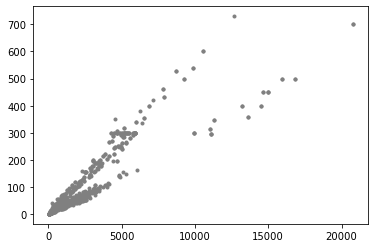

In [32]:
#Grafico de puntos - KG Brutos vs. Cantidad de Cajones
plt.scatter(pesca.KgBr ,pesca.Cj, marker=".",facecolor='gray')
plt.show()

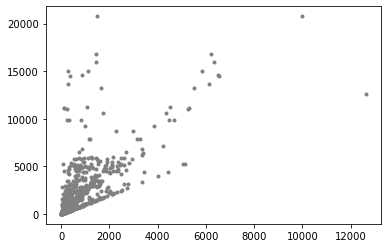

In [33]:
#Grafico de puntos - KG Terminados vs. Kg Netos
plt.scatter(pesca.KGT,pesca.KgN, marker=".",facecolor='gray')
plt.show()

In [34]:
#Suma de Rinde por Dueno
pesca[['Dueño2','Rinde']].groupby('Dueño2').sum().sort_values('Rinde', ascending=False)

,Rinde
Dueño2,
10,125.718258
19,43.766865
16,25.187868
9,24.712790
5,23.073053
6,20.728185
18,20.508533
17,18.023023
8,11.742827


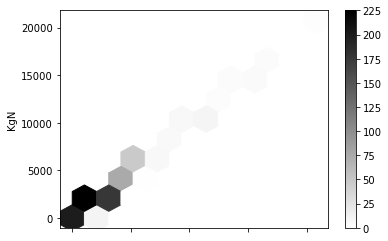

In [35]:
#Grafico de hexagonos - KG Brutos vs. Kg Netos
pesca.plot.hexbin(x='KgBr', y='KgN', gridsize=10,cmap="gist_yarg")
plt.show()

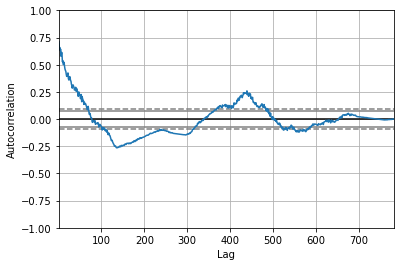

In [36]:
#Grafico de Autocorrelacion - Desperdicio
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(pesca.Desp)
plt.show()

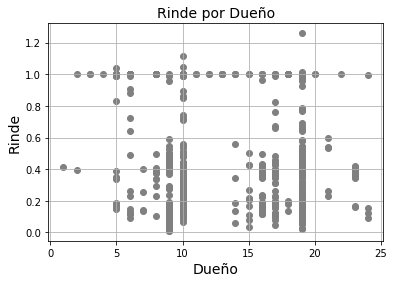

In [37]:
#Grafico de puntos - Duenos vs. Rinde
df = pd.DataFrame(pesca,columns=['Dueño2','Rinde'])
plt.scatter(df['Dueño2'], df['Rinde'], color='grey', marker='o')
plt.title('Rinde por Dueño', fontsize=14)
plt.xlabel('Dueño', fontsize=14)
plt.ylabel('Rinde', fontsize=14)
plt.grid(True)
plt.show()

In [38]:
sns.set()

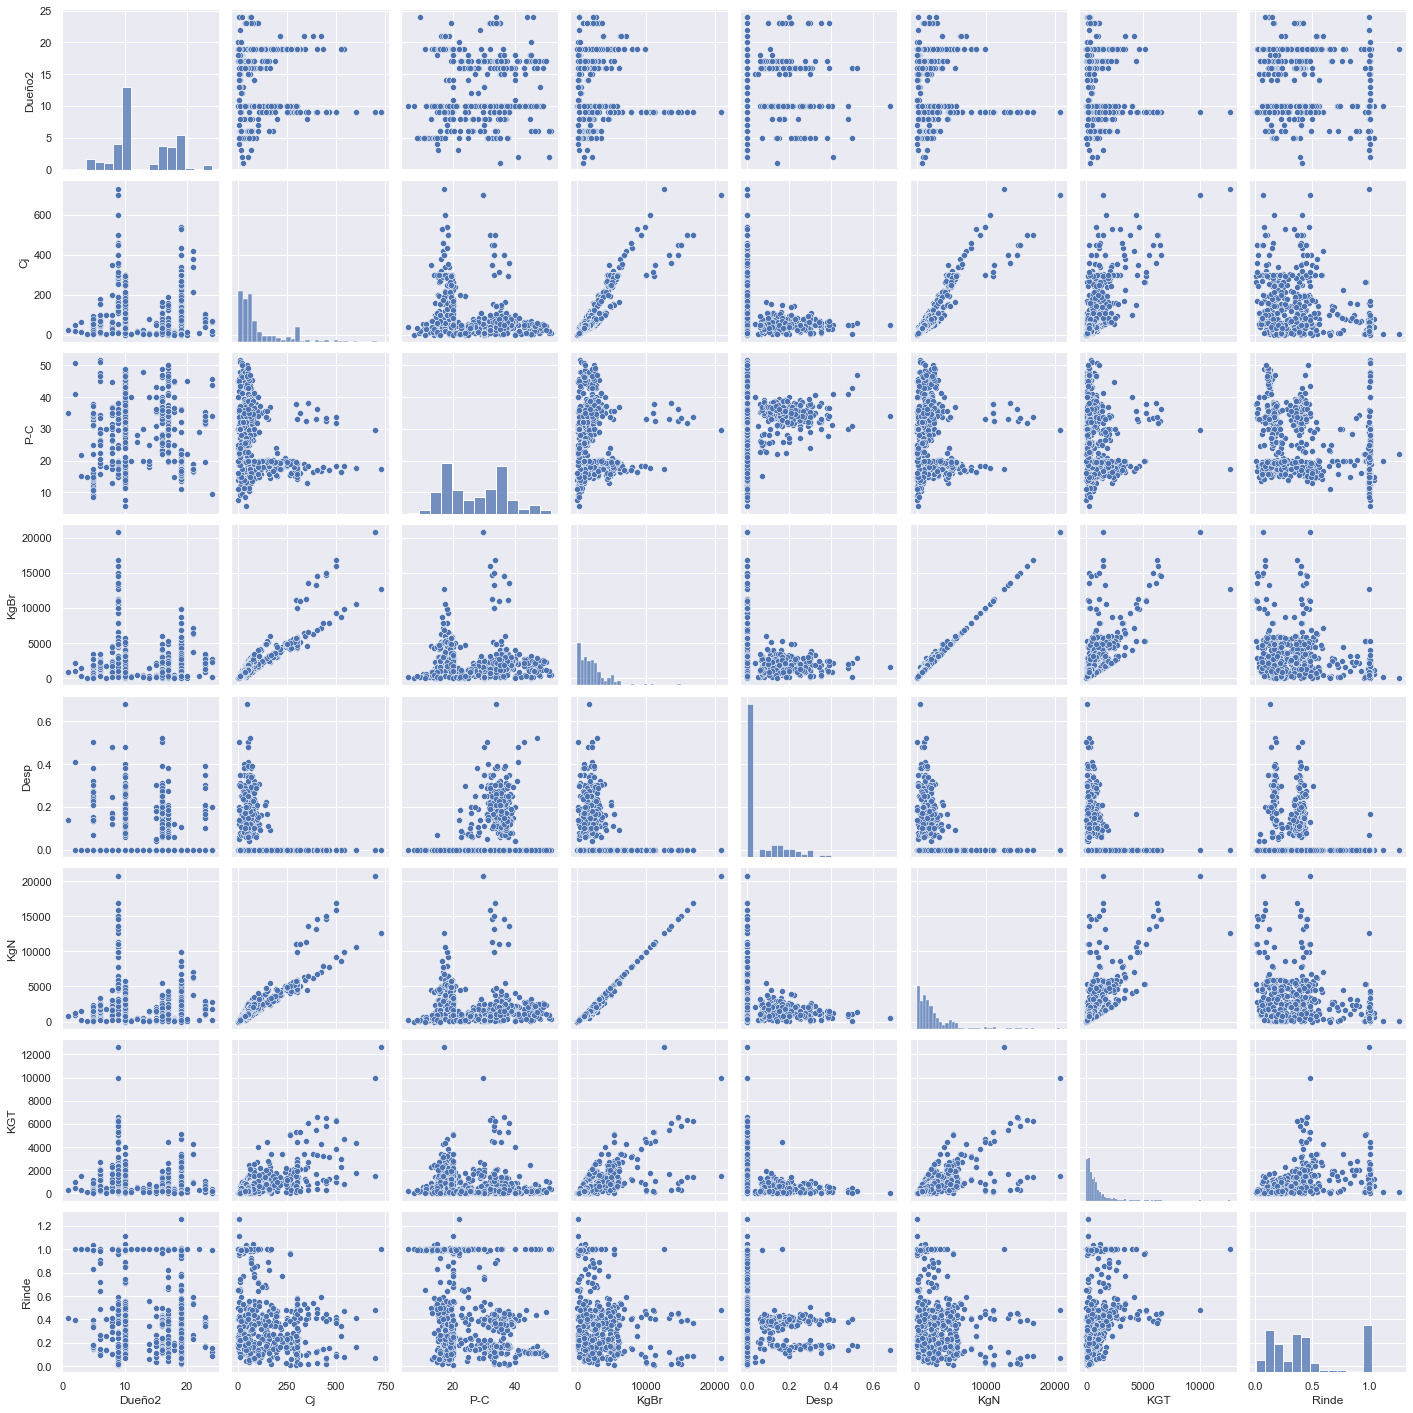

In [41]:
sns.pairplot(pesca)
plt.show()